In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
plt.style.use('ggplot')

In [85]:
import pandas as pd

file1 = open('aapl.txt', 'r')
Lines = file1.readlines()

data = []
minute = []
price = []

for line in Lines:
    data.append(line.strip().split(',')[0])
    minute.append(line.strip().split(',')[1])
    price.append(float(line.strip().split(',')[5]))

df = pd.DataFrame({"Date": data})
df["minute"] = minute
df["Adj Close"] = price

df20 = df.iloc[:20]

In [76]:
def bollinger_bands(data, period=20, std_factor=2):
    data["std"] = data["Adj Close"].rolling(period).std()
    data["mean"] = data["Adj Close"].rolling(period).mean()
    data["Superior Band"] = data["mean"] + data["std"] * std_factor
    data["Inferior Band"] = data["mean"] - data["std"] * std_factor
    
    idx_venda = data[data["Adj Close"] > data["Superior Band"]].index
    data.loc[idx_venda, 'indicador'] = "Venda"
    idx_compra = data[data["Adj Close"] < data["Inferior Band"]].index
    data.loc[idx_compra, "indicador"] = "Compra"
    
def create_series(date, minute, adj_close):
    serie = pd.Series({"Date" : "2017-11-17", 
                       "minute": "17:20:00",
                       "Adj Close": adj_close})
    return serie

In [145]:
df20

,Date,minute,Adj Close,std,mean,Superior Band,Inferior Band,indicador
0,2017-11-17,15:35:00,170.3600,NaN,NaN,NaN,NaN,NaN
1,2017-11-17,15:40:00,170.0600,NaN,NaN,NaN,NaN,NaN
2,2017-11-17,15:45:00,170.2500,NaN,NaN,NaN,NaN,NaN
3,2017-11-17,15:50:00,169.9700,NaN,NaN,NaN,NaN,NaN
4,2017-11-17,15:55:00,170.1432,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67,2017-11-17,17:20:00,170.7920,0.106348,170.699335,170.912030,170.486640,NaN
68,2017-11-17,17:20:00,170.6900,0.101233,170.705835,170.908301,170.503369,NaN
69,2017-11-17,17:20:00,170.7700,0.102151,170.709835,170.914137,170.505533,NaN
70,2017-11-17,17:20:00,170.8460,0.105108,170.712535,170.922751,170.502319,NaN


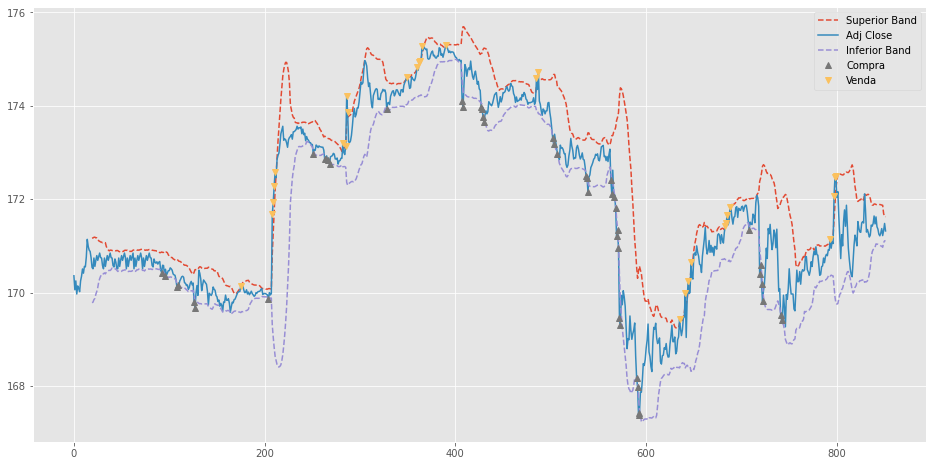

In [147]:
plt.figure(figsize=(16,8))
plt.plot(df20["Superior Band"], '--', label = "Superior Band")
plt.plot(df20["Adj Close"], label = "Adj Close")
plt.plot(df20["Inferior Band"], '--', label = "Inferior Band")
plt.plot(df20[df20['indicador'] == "Compra"]["Adj Close"], '^', label = "Compra")
plt.plot(df20[df20['indicador'] == "Venda"]["Adj Close"], 'v', label = "Venda")
plt.legend()
plt.show()

In [146]:
for i in range(20,800):
    print(df.iloc[i]["Date"], df.iloc[i]["minute"], df.iloc[i]["Adj Close"])
    df20 = df20.append(create_series(df.iloc[i]["Date"],
                              df.iloc[i]["minute"],
                              df.iloc[i]["Adj Close"]),
                              ignore_index=True
               )
    bollinger_bands(df20)
    print(df20.iloc[i]["Superior Band"])

2017-11-17 17:15:00 170.51
171.17040040793486
2017-11-17 17:20:00 170.74
171.18342020815174
2017-11-17 17:25:00 170.56
171.1871697003166
2017-11-17 17:30:00 170.69
171.17018965233473
2017-11-17 17:35:00 170.792
171.17562523116987
2017-11-17 17:40:00 170.69
171.15384638504506
2017-11-17 17:45:00 170.77
171.10814193806007
2017-11-17 17:50:00 170.846
171.09780136637147
2017-11-17 17:55:00 170.7487
171.0830718424732
2017-11-17 18:00:00 170.74
171.0809954931282
2017-11-17 18:05:00 170.58
171.06528080366158
2017-11-17 18:10:00 170.5497
171.0691746521081
2017-11-17 18:15:00 170.72
171.0671547586568
2017-11-17 18:20:00 170.65
171.0673537783661
2017-11-17 18:25:00 170.63
170.9848577900881
2017-11-17 18:30:00 170.6599
170.9454403695971
2017-11-17 18:35:00 170.61
170.9138819424623
2017-11-17 18:40:00 170.65
170.8933180164453
2017-11-17 18:45:00 170.6662
170.90856578983403
2017-11-17 18:50:00 170.481
170.90846261017222
2017-11-17 18:55:00 170.43
170.90003400568403
2017-11-17 19:00:00 170.5858
170.

In [139]:
import math
math.isnan(df20.iloc[0].indicador)

True

In [144]:
bollinger_bands(df)
df[df["indicador"] == "Compra"]

,Date,minute,Adj Close,std,mean,Superior Band,Inferior Band,indicador
40,2017-11-17,18:55:00,170.4300,0.104462,170.660175,170.869098,170.451252,Compra
43,2017-11-17,19:10:00,170.3550,0.122325,170.636635,170.881285,170.391985,Compra
56,2017-11-17,20:15:00,170.1180,0.127002,170.452125,170.706129,170.198121,Compra
57,2017-11-17,20:20:00,170.1552,0.134405,170.427385,170.696195,170.158575,Compra
74,2017-11-17,21:45:00,169.7900,0.122113,170.188505,170.432732,169.944278,Compra
...,...,...,...,...,...,...,...,...
902,2017-12-06,15:40:00,168.8150,0.447609,169.791195,170.686412,168.895978,Compra
903,2017-12-06,15:45:00,168.6800,0.507854,169.724285,170.739993,168.708577,Compra
904,2017-12-06,15:50:00,167.8800,0.653887,169.630285,170.938059,168.322511,Compra
936,2017-12-06,18:30:00,169.0600,0.236522,169.578080,170.051123,169.105037,Compra
